In [260]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

In [261]:
dataset = pd.read_csv(r"C:\Users\NITRO V\Downloads\archive\nearest-earth-objects(1910-2024).csv")

In [262]:
dataset

neo_id                name  absolute_magnitude  \
0        2162117  162117 (1998 SD15)              19.140   
1        2349507    349507 (2008 QY)              18.500   
2        2455415    455415 (2003 GA)              21.450   
3        3132126           (2002 PB)              20.630   
4        3557844           (2011 DW)              22.700   
...          ...                 ...                 ...   
338194  54403809          (2023 VS4)              28.580   
338195  54415298          (2023 XW5)              28.690   
338196  54454871          (2024 KJ7)              21.919   
338197  54456245           (2024 NE)              23.887   
338198  54460573          (2024 NH3)              22.951   

        estimated_diameter_min  estimated_diameter_max orbiting_body  \
0                     0.394962                0.883161         Earth   
1                     0.530341                1.185878         Earth   
2                     0.136319                0.304818         Earth   
3                     0.198863                0.444672         Earth   
4                     0.076658                0.171412         Earth   
...                        ...                     ...           ...   
338194                0.005112                0.011430         Earth   
338195                0.004859                0.010865         Earth   
338196                0.109839                0.245607         Earth   
338197                0.044377                0.099229         Earth   
338198                0.068290                0.152700         Earth   

        relative_velocity  miss_distance  is_hazardous  
0            71745.401048   5.814362e+07         False  
1           109949.757148   5.580105e+07          True  
2            24865.506798   6.720689e+07         False  
3            78890.076805   3.039644e+07         False  
4            56036.519484   6.311863e+07         False  
...                   ...            ...           ...  
338194       56646.985988   6.406548e+07         False  
338195       21130.768947   2.948883e+07         False  
338196       11832.041031   5.346078e+07         False  
338197       56198.382733   5.184742e+06         False  
338198       42060.357830   7.126682e+06         False  

[338199 rows x 9 columns]

In [263]:
dataset.isnull().sum()

neo_id                     0
name                       0
absolute_magnitude        28
estimated_diameter_min    28
estimated_diameter_max    28
orbiting_body              0
relative_velocity          0
miss_distance              0
is_hazardous               0
dtype: int64

In [264]:
from sklearn.impute import KNNImputer

In [265]:
num_col = dataset.select_dtypes(include= ['float64', 'int64']).columns
no_num_col = dataset.select_dtypes(exclude= ['float64', 'int64']).columns

In [266]:
num_data = dataset[num_col]
no_num_data = dataset[no_num_col]

In [267]:
imputer = KNNImputer(n_neighbors=5)
data_imputed = imputer.fit_transform(num_data)
new_dataset = pd.DataFrame(data_imputed, columns= num_col)

In [268]:
ss = StandardScaler()

In [269]:
sca_data = ss.fit_transform( new_dataset)
sca_data1 = pd.DataFrame(sca_data, columns=num_col)

In [270]:
dataset = pd.concat([sca_data1, no_num_data.reset_index(drop=True)], axis=1)

In [271]:
dataset.isnull().sum()

neo_id                    0
absolute_magnitude        0
estimated_diameter_min    0
estimated_diameter_max    0
relative_velocity         0
miss_distance             0
name                      0
orbiting_body             0
is_hazardous              0
dtype: int64

In [272]:
dataset = dataset.drop('name', axis=1)
dataset = dataset.drop('orbiting_body',axis=1)


In [273]:
input_dataset = dataset.iloc[:,:-1]
output_dataset = dataset.iloc[:,-1]

In [274]:
input_dataset

neo_id  absolute_magnitude  estimated_diameter_min  \
0      -0.674936           -1.302777                0.755570   
1      -0.666743           -1.522624                1.186889   
2      -0.662112           -0.509268               -0.068468   
3      -0.632526           -0.790947                0.130800   
4      -0.613913           -0.079879               -0.258548   
...          ...                 ...                     ...   
338194  1.609132            1.939964               -0.486494   
338195  1.609635            1.977750               -0.487299   
338196  1.611365           -0.348161               -0.152833   
338197  1.611425            0.327868               -0.361396   
338198  1.611614            0.006342               -0.285209   

        estimated_diameter_max  relative_velocity  miss_distance  
0                     0.755570           0.783537       0.799476  
1                     1.186889           2.230715       0.686711  
2                    -0.068468          -0.992271       1.235756  
3                     0.130800           1.054176      -0.536196  
4                    -0.258548           0.188485       1.038958  
...                        ...                ...            ...  
338194               -0.486494           0.211610       1.084537  
338195               -0.487299          -1.133742      -0.579886  
338196               -0.152833          -1.485978       0.574057  
338197               -0.361396           0.194617      -1.749816  
338198               -0.285209          -0.340931      -1.656337  

[338199 rows x 6 columns]

In [275]:
dataset

neo_id  absolute_magnitude  estimated_diameter_min  \
0      -0.674936           -1.302777                0.755570   
1      -0.666743           -1.522624                1.186889   
2      -0.662112           -0.509268               -0.068468   
3      -0.632526           -0.790947                0.130800   
4      -0.613913           -0.079879               -0.258548   
...          ...                 ...                     ...   
338194  1.609132            1.939964               -0.486494   
338195  1.609635            1.977750               -0.487299   
338196  1.611365           -0.348161               -0.152833   
338197  1.611425            0.327868               -0.361396   
338198  1.611614            0.006342               -0.285209   

        estimated_diameter_max  relative_velocity  miss_distance  is_hazardous  
0                     0.755570           0.783537       0.799476         False  
1                     1.186889           2.230715       0.686711          True  
2                    -0.068468          -0.992271       1.235756         False  
3                     0.130800           1.054176      -0.536196         False  
4                    -0.258548           0.188485       1.038958         False  
...                        ...                ...            ...           ...  
338194               -0.486494           0.211610       1.084537         False  
338195               -0.487299          -1.133742      -0.579886         False  
338196               -0.152833          -1.485978       0.574057         False  
338197               -0.361396           0.194617      -1.749816         False  
338198               -0.285209          -0.340931      -1.656337         False  

[338199 rows x 7 columns]

In [276]:
dataset

neo_id  absolute_magnitude  estimated_diameter_min  \
0      -0.674936           -1.302777                0.755570   
1      -0.666743           -1.522624                1.186889   
2      -0.662112           -0.509268               -0.068468   
3      -0.632526           -0.790947                0.130800   
4      -0.613913           -0.079879               -0.258548   
...          ...                 ...                     ...   
338194  1.609132            1.939964               -0.486494   
338195  1.609635            1.977750               -0.487299   
338196  1.611365           -0.348161               -0.152833   
338197  1.611425            0.327868               -0.361396   
338198  1.611614            0.006342               -0.285209   

        estimated_diameter_max  relative_velocity  miss_distance  is_hazardous  
0                     0.755570           0.783537       0.799476         False  
1                     1.186889           2.230715       0.686711          True  
2                    -0.068468          -0.992271       1.235756         False  
3                     0.130800           1.054176      -0.536196         False  
4                    -0.258548           0.188485       1.038958         False  
...                        ...                ...            ...           ...  
338194               -0.486494           0.211610       1.084537         False  
338195               -0.487299          -1.133742      -0.579886         False  
338196               -0.152833          -1.485978       0.574057         False  
338197               -0.361396           0.194617      -1.749816         False  
338198               -0.285209          -0.340931      -1.656337         False  

[338199 rows x 7 columns]

In [277]:
x_train, x_test, y_train, y_test = train_test_split(input_dataset, output_dataset, test_size=0.2,random_state=42)


In [278]:
x_train.shape, x_test.shape

((270559, 6), (67640, 6))

In [279]:
import tensorflow

In [280]:
from keras.layers import BatchNormalization, Dense, Dropout
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.regularizers import L2

In [281]:
ann = Sequential()


In [287]:
ann.add(Dense(7, input_dim = 6, activation='relu', kernel_regularizer=L2(l2=.01)))
ann.add(BatchNormalization())
ann.add(Dropout(0.5))
ann.add(Dense(6, activation='relu', kernel_regularizer=L2(l2=.01)))
ann.add(BatchNormalization())
ann.add(Dropout(0.5))
ann.add(Dense(5, activation='relu', kernel_regularizer=L2(l2=.01)))
ann.add(BatchNormalization())
ann.add(Dropout(0.5))
ann.add(Dense(4, activation='relu', kernel_regularizer=L2(l2=.01)))
ann.add(BatchNormalization())
ann.add(Dropout(0.5))
ann.add(Dense(2, activation='relu', kernel_regularizer=L2(l2=.01)))
ann.add(BatchNormalization())
ann.add(Dropout(0.5))
ann.add(Dense(1, activation='sigmoid'))

c:\Users\NITRO V\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [288]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])

In [289]:
x_train

neo_id  absolute_magnitude  estimated_diameter_min  \
183838 -0.610003           -0.629497                0.007492   
269345 -0.611693            0.469738               -0.385883   
295431 -0.662226           -0.485222               -0.082245   
73173  -0.655210           -0.790947                0.130800   
217719 -0.622972           -0.354688               -0.149758   
...          ...                 ...                     ...   
119879 -0.604862            0.091876               -0.308780   
259178 -0.599859            1.878132               -0.485087   
131932 -0.614112           -0.746290                0.093983   
146867 -0.612819            0.246456               -0.345091   
121958 -0.668433           -1.065755                0.413022   

        estimated_diameter_max  relative_velocity  miss_distance  
183838                0.007492           0.655720       0.574605  
269345               -0.385883           0.608410       1.197206  
295431               -0.082245          -0.835531       1.132994  
73173                 0.130800          -0.093071      -1.505158  
217719               -0.149758          -0.362178       1.025976  
...                        ...                ...            ...  
119879               -0.308780           0.457229       1.177080  
259178               -0.485087          -0.117785       0.361720  
131932                0.093983           0.665773      -0.661232  
146867               -0.345091          -1.209696      -0.529537  
121958                0.413022          -0.371332       0.719511  

[270559 rows x 6 columns]

In [290]:
x_train.shape
x_test.shape

(67640, 6)

In [295]:
ann.fit(x_train, y_train, batch_size=2000, epochs=100, validation_data=(x_test, y_test), callbacks=EarlyStopping())

Epoch 1/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8732 - loss: 0.3803 - val_accuracy: 0.8724 - val_loss: 0.3817
Epoch 2/100
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8722 - loss: 0.3821 - val_accuracy: 0.8724 - val_loss: 0.3817


In [405]:
pred = ann.predict(x_train)

8455/8455 ━━━━━━━━━━━━━━━━━━━━ 6s 649us/step


In [406]:
pred

array([[0.12702353],
       [0.12702353],
       [0.12702353],
       ...,
       [0.12702353],
       [0.12702353],
       [0.12702353]], dtype=float32)

In [407]:
for i in pred:
    print(i[0])

0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353

In [457]:
pred = ann.predict(x_train)
pred_data = []
for i in pred:
    if i[0]<0.5:
        pred_data.append(0)
    else:
        pred_data.append(1)

8455/8455 ━━━━━━━━━━━━━━━━━━━━ 6s 669us/step


In [458]:
pred

array([[0.12702353],
       [0.12702353],
       [0.12702353],
       ...,
       [0.12702353],
       [0.12702353],
       [0.12702353]], dtype=float32)

In [459]:
pred_data

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [460]:
from sklearn.metrics import accuracy_score

In [461]:
accuracy_score(y_train,pred_data)*100

87.23642532682335

In [462]:
pred_test = ann.predict(x_test)
pred_test

2114/2114 ━━━━━━━━━━━━━━━━━━━━ 1s 701us/step


array([[0.12702353],
       [0.12702353],
       [0.12702353],
       ...,
       [0.12702353],
       [0.12702353],
       [0.12702353]], dtype=float32)

In [403]:
pred_test = ann.predict(x_test)  # This should return an array or list of predictions

# Check the shape and type of pred_data
print(type(pred_test))
print(pred_test.shape)


2114/2114 ━━━━━━━━━━━━━━━━━━━━ 1s 641us/step
<class 'numpy.ndarray'>
(67640, 1)


In [416]:
for i in pred_test:
    print(i[0])

0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353
0.12702353

In [420]:
pred_test = ann.predict(x_test)
pred_data1 = []
for i in pred_test:
    if i[0]<0.5:
        pred_data1.append(0)
    else:
        pred_data1.append(1)

2114/2114 ━━━━━━━━━━━━━━━━━━━━ 1s 632us/step


In [421]:
print(pred_data[:5])  # Display the first few elements


[0, 0, 0, 0, 0]


0.8723642532682335

In [426]:
print("This is Testing accuracy: ", accuracy_score(y_test, pred_data1)*100)
print("This is Training accuracy: ",accuracy_score(y_train, pred_data)*100)

This is Testing accuracy:  87.24275576581904
This is Training accuracy:  87.23642532682335


In [428]:
import numpy as np
from keras.models import load_model

In [431]:
# Get the input shape of your model
input_shape = ann.input_shape
print(f"Model expects input shape: {input_shape}")


Model expects input shape: (None, 6)


In [486]:
import numpy as np
# plt.figure(figsize=(18,18))
# Sample new data (ensure it has the same number of features as your training data)
# Note: The data here should have the same number of features as used during training (7 features in this case)
x_new_data = np.array([[627157, 21.5, 0.133215567, 0.297879063, 57853.29574, 27279080.74]])  # Ensure this has 6 features

# Predict probabilities
pred_prob = ann.predict(x_new_data)

# Convert probabilities to binary outcomes using a threshold
threshold = 0.5
predictions = (pred_prob >= threshold).astype(int)

# Convert binary outcomes to True/False
predictions_true_false = [bool(pred[0]) for pred in predictions]

# Print or use the predictions
print(predictions_true_false)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[False]


Epoch 1/50


136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8716 - loss: 0.3833 - val_accuracy: 0.8724 - val_loss: 0.3817
Epoch 2/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8721 - loss: 0.3824 - val_accuracy: 0.8724 - val_loss: 0.3817
Epoch 3/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8716 - loss: 0.3834 - val_accuracy: 0.8724 - val_loss: 0.3817
Epoch 4/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8718 - loss: 0.3829 - val_accuracy: 0.8724 - val_loss: 0.3817
Epoch 5/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8720 - loss: 0.3826 - val_accuracy: 0.8724 - val_loss: 0.3817
Epoch 6/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8720 - loss: 0.3826 - val_accuracy: 0.8724 - val_loss: 0.3817
Epoch 7/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8731 - loss: 0.3804 - val_accuracy: 0.8724 - val_loss: 0.3817
Epoch 8/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8726 - loss: 0.3813 - val_accuracy: 0.8724 - val_

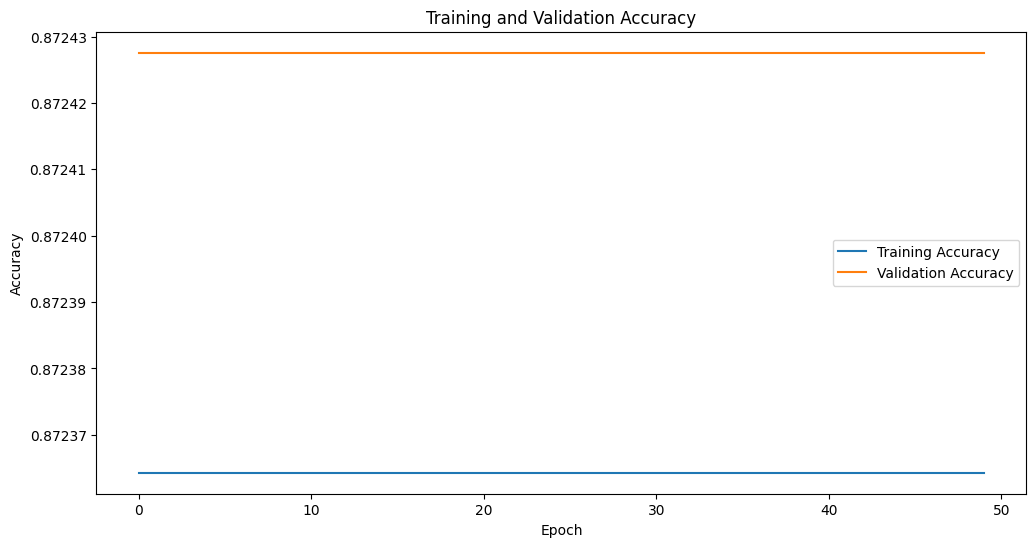

In [482]:
import matplotlib.pyplot as plt

# Fit the model and get the history
history = ann.fit(x_train, y_train, batch_size=2000, epochs=50, validation_data=(x_test, y_test))




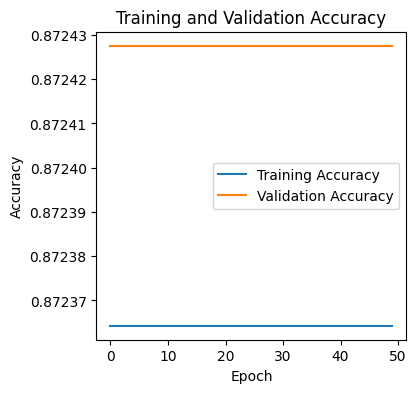

In [490]:
# Get training and validation accuracy from the history
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot accuracy
plt.figure(figsize=(4, 4))
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()
